In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [23]:
# Load Dataset

df = pd.read_csv("personality_datasert.csv")

In [3]:
# Explore Dataset
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2900 non-null   float64
 1   Stage_fear                 2900 non-null   object 
 2   Social_event_attendance    2900 non-null   float64
 3   Going_outside              2900 non-null   float64
 4   Drained_after_socializing  2900 non-null   object 
 5   Friends_circle_size        2900 non-null   float64
 6   Post_frequency             2900 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.441180,2.872608,2.221597,4.232340,2.893587
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.963354,3.000000,5.000000,3.000000
75%,7.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
df.isnull().sum()

,0
Time_spent_Alone,0
Stage_fear,0
Social_event_attendance,0
Going_outside,0
Drained_after_socializing,0
Friends_circle_size,0
Post_frequency,0
Personality,0


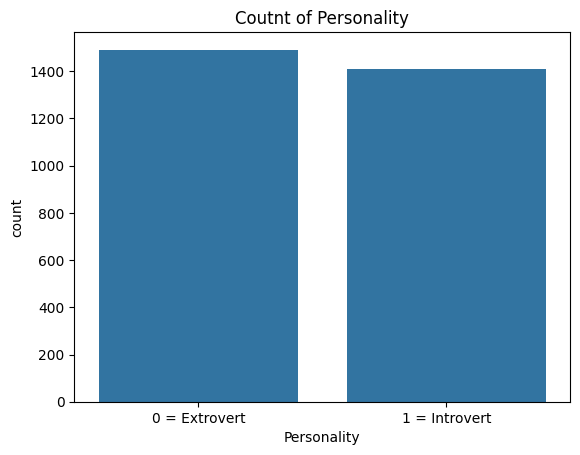

In [7]:
# Count Plot for Personality

sns.countplot(data =df, x = "Personality")
plt.xticks([0,1], ['0 = Extrovert', '1 = Introvert'])
plt.title("Coutnt of Personality")
plt.show()

In [8]:
# Encode categorical data

encoder = LabelEncoder()
df['Stage_fear'] = encoder.fit_transform(df['Stage_fear'])
df['Drained_after_socializing'] = encoder.fit_transform(df['Drained_after_socializing'])
df['Personality'] = encoder.fit_transform(df['Personality'])

In [9]:
df.head(2)

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,0
1,9.0,1,0.0,0.0,1,0.0,3.0,1


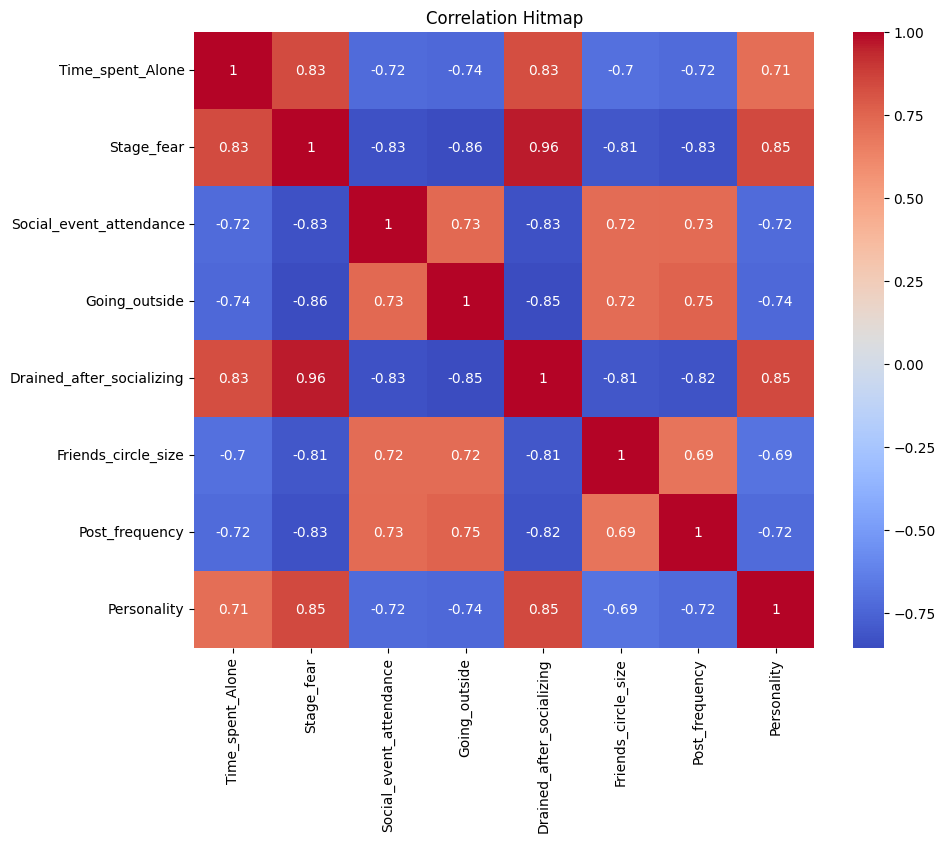

In [10]:
# Correlational HitMap

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Hitmap')
plt.show()

In [11]:
x = df.drop('Personality', axis = 1)
y = df['Personality']

In [12]:
# Split data into Train and test size

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [13]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

# convert into dataFrame for better readablity
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns, index = x_train.index)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns, index = x_test.index)

In [14]:
x_train_scaled.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
2078,-0.437476,-0.972784,0.363759,1.348934,-0.972784,0.889367,1.876505
163,0.434649,1.027977,-0.332327,-0.001941,1.027977,-1.242188,-1.229353
1938,1.597482,1.027977,-0.680371,-0.452233,1.027977,-1.242188,-1.229353
252,1.306774,1.027977,-1.028414,-0.452233,1.027977,-0.768509,-0.884258
2232,1.597482,1.027977,-1.376457,-1.352816,1.027977,-0.531669,-0.884258


In [15]:
models = {
    "LogisticRegression" : LogisticRegression(),
    "DecisionTreeClassifier" : DecisionTreeClassifier(),
    "RandomForestClassifier" : RandomForestClassifier(),
    "KNeighborsClassifier" : KNeighborsClassifier()
}

In [19]:
results = {}
for name, model in models.items():
  model.fit(x_train_scaled, y_train)
  results[name] = model  # Store the trained model in the results dictionary
  y_pred = model.predict(x_test_scaled)
  cm = confusion_matrix(y_test, y_pred)
  print(f"{name}: \n")
  print(f"\n Accuracy of {name}:{accuracy_score(y_test, y_pred)*100:.2f}")
  print(cm)
  print(classification_report(y_test, y_pred))

LogisticRegression: 


 Accuracy of LogisticRegression:92.07
[[278  24]
 [ 22 256]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       302
           1       0.91      0.92      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

DecisionTreeClassifier: 


 Accuracy of DecisionTreeClassifier:86.38
[[259  43]
 [ 36 242]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       302
           1       0.85      0.87      0.86       278

    accuracy                           0.86       580
   macro avg       0.86      0.86      0.86       580
weighted avg       0.86      0.86      0.86       580

RandomForestClassifier: 


 Accuracy of RandomForestClassifier:92.41
[[277  25]
 [ 19 259]]
              precision    recall  f1-score   support

           0       0.94

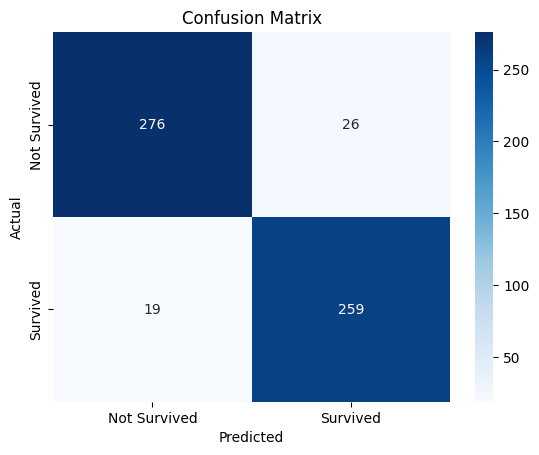

In [17]:
# Plot Confusion Matrix as heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived','Survived'], yticklabels=['Not Survived','Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

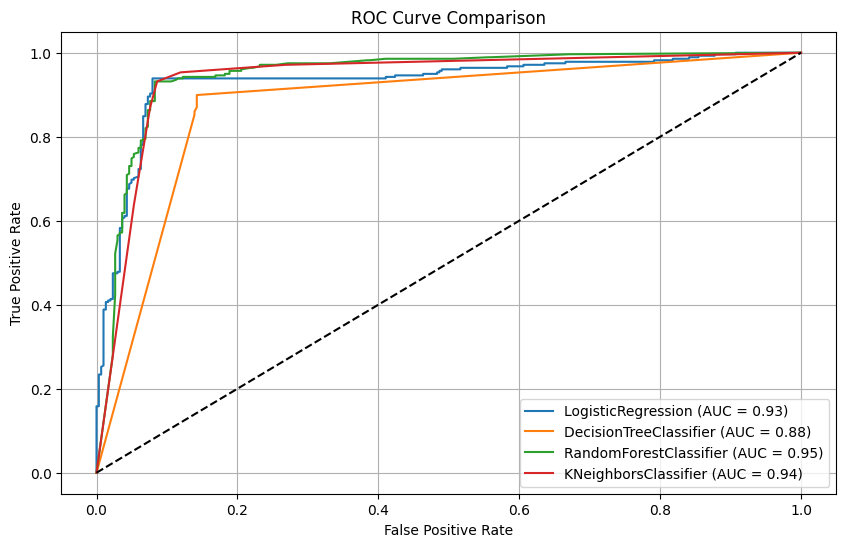

In [20]:
# Plot ROC curves
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 6))
for name, model in results.items():
    y_prob = model.predict_proba(x_test_scaled)[:, 1]  # Use scaled test data for prediction
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()

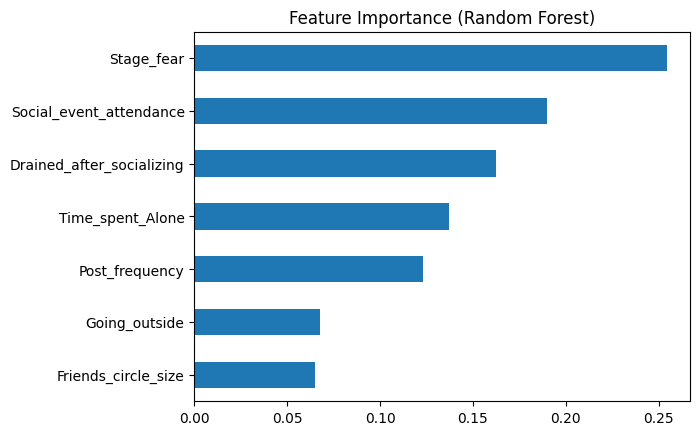

In [22]:
# 12. Feature Importance
rf_model = results["RandomForestClassifier"]
feature_importances = pd.Series(rf_model.feature_importances_, index=x_train.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.show()